<a href="https://colab.research.google.com/github/polishPKM/FoDS_FinalProject_GPStoreReview/blob/main/FoDS_(data_scraping)_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [ ]:
app_packages = [
    'jp.co.spike_chunsoft.DR1',
    'jp.co.spike_chunsoft.DR2',
    'jp.co.spike_chunsoft.DRV3',
    'jp.co.spike_chunsoft.DRA',
    'com.snowprintstudios.tacticus',
    'com.mobile.legends',
    'com.ea.gp.fifamobile',
    'com.miHoYo.GenshinImpact',
    'com.miHoYo.bh3oversea',
    'com.miniclip.plagueinc',
    
]

In [ ]:
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 10/10 [00:01<00:00,  5.27it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
      json_object,
      sort_keys=True,
      indent=2,
      default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[0])

NameError: ignored

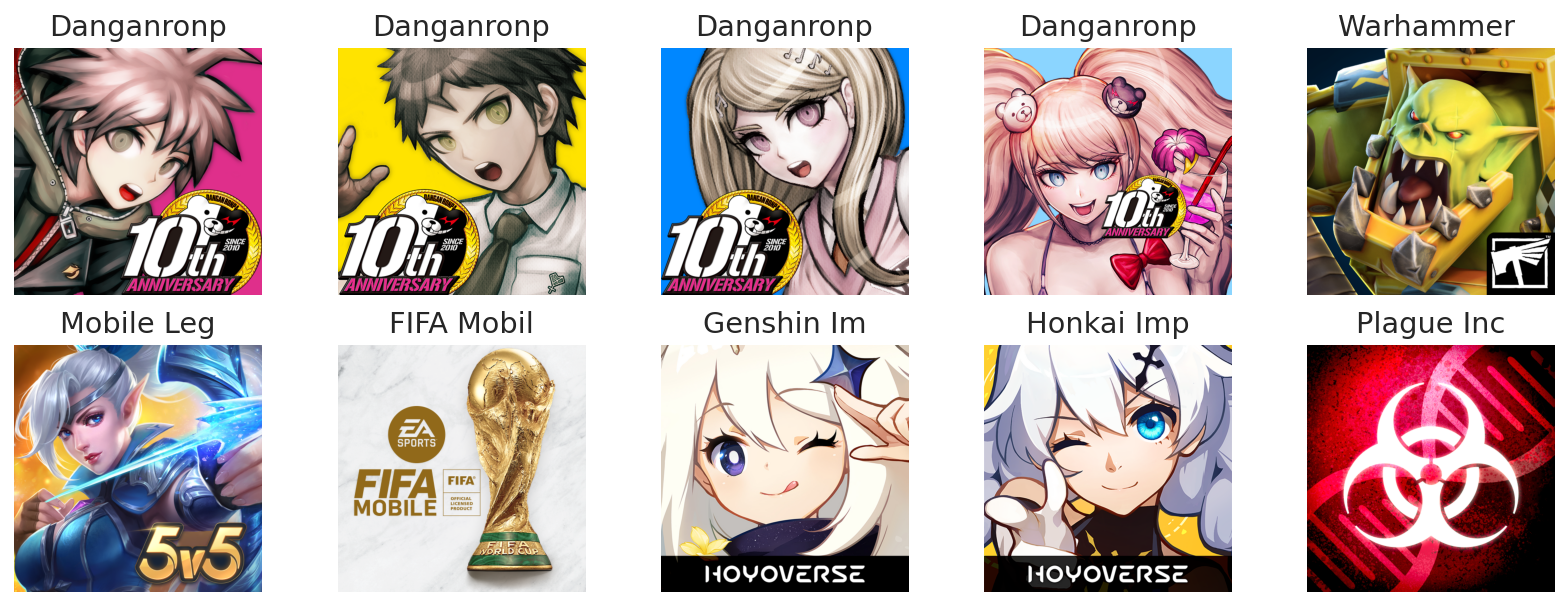

In [ ]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('/content/sample_data/apps.csv', index=None, header=True)

In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='en',
                country='us',
                sort=sort_order,
                count= 150 if score == 3 else 200,
                filter_score_with=score
            )
        for r in rvs:
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = ap

        app_reviews.extend(rvs)

100%|██████████| 10/10 [00:37<00:00,  3.75s/it]


In [ ]:
print_json(app_reviews[0])


{
  "appId": "jp.co.spike_chunsoft.DR1",
  "at": "2022-09-23 13:38:04",
  "content": "I really want to play the game. But the control is utterly awful to a degree it is just unplayable. it never allows me to inspect anything I tap on. On third day, I need to leave the room by tap on the door. But I simply cannot do this because wherever I tap on the game just ignore my tap position and assign it to some random position. A waste of money!",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "1.0.3",
  "reviewId": "133c8b2e-e8c1-48ff-ac05-0208c96d12c3",
  "score": 1,
  "sortOrder": "newest",
  "thumbsUpCount": 2,
  "userImage": "https://play-lh.googleusercontent.com/a/AEdFTp4r4AYx_E0VraPS-ZmSz5KiHTplD2OzXjnaZ0GQ=mo",
  "userName": "Lloyd Lian"
}



In [ ]:
print("We were able to scrap: ", len(app_reviews), " reviews")


We were able to scrap:  6469  reviews


In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('/content/sample_data/reviews.csv', index=None, header=True)

In [ ]:
app_reviews_df.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,133c8b2e-e8c1-48ff-ac05-0208c96d12c3,Lloyd Lian,https://play-lh.googleusercontent.com/a/AEdFTp...,I really want to play the game. But the contro...,1,2,1.0.3,2022-09-23 13:38:04,None,NaT,newest,jp.co.spike_chunsoft.DR1
1,092311a0-9c51-4aec-adc4-c20b16bfedee,Gabby v s,https://play-lh.googleusercontent.com/a-/AD5-W...,This game was amazing till I got to the point ...,1,4,1.0.3,2022-07-31 13:54:11,None,NaT,newest,jp.co.spike_chunsoft.DR1
2,4c2b7ce8-f0e1-4740-a996-3b2010e5181e,Andrej Zivojinovic (Extraordinare),https://play-lh.googleusercontent.com/a/AEdFTp...,Will not even start. All I see is Spike Chunso...,1,10,1.0.3,2022-07-27 16:42:51,None,NaT,newest,jp.co.spike_chunsoft.DR1
3,b21bcdf9-53ac-48f3-820c-877ae93bfb99,Eri Chan,https://play-lh.googleusercontent.com/a-/AD5-W...,Currently I haven't gotten to play the game si...,1,0,None,2022-06-20 00:15:33,None,NaT,newest,jp.co.spike_chunsoft.DR1
4,9b6d66ae-223c-4974-987e-821389d06ed4,izuku midoriya,https://play-lh.googleusercontent.com/a-/AD5-W...,I can't even open the app. Trifling.,1,0,1.0.2,2022-03-05 05:39:32,None,NaT,newest,jp.co.spike_chunsoft.DR1
